## Regression model with PyTorch


In [1]:
import numpy as np
import pandas as pd
import torch
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.nn.functional as F

In [2]:
plt.style.use('seaborn')

In [3]:
datapath = os.path.join(os.getcwd(), 'forestfires.csv')

In [4]:
df = pd.read_csv(datapath)

### Build models

In [5]:
# model 1: not scaled or transformed with area as a target variable. 
# area is very skewed towards 0, it can have a bad impact on the result.
#     features: ['FFMC','temp','RH','wind','rain', 'ISI']
#     target: 'area'

In [6]:
# convert to pytoch dataset
batch_size = 20

def get_dl(inputs, targets, batch_size):
    dataset = TensorDataset(torch.tensor(inputs, dtype = torch.float32), torch.tensor(targets, dtype = torch.float32))

    # we'll split data into train and test using random split 
    train, val = random_split(dataset, [450, 67])

    # create data loaders
    train_dl = DataLoader(train, batch_size = batch_size, shuffle = True)
    val_dl = DataLoader(val, batch_size = batch_size, shuffle = True)
    
    return train_dl, val_dl
    
    

In [7]:
# model 1 data
inputs1 = df[['FFMC','temp','RH','wind','rain', 'ISI']].values
target1 = df['area'].values

train_dl1, val_dl1 = get_dl(inputs1, target1, batch_size=batch_size)

In [8]:
# input and output sizes are the same for all models. input = 1 and putput = 6.
output_size = 1
input_size = 6

In [9]:
# a simple linear model
class Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        
        output = self.linear(x)
        return output    

In [10]:
def train_model(model, optimizer, train_dl, epochs):
    history = []
    
    for e in range(epochs):
        print(f'Epoch # %s' %e)
        losses = 0

        for i, (inputs, targets) in enumerate(train_dl):
            print(f'    Batch # %s' %i)

            out = model(inputs).squeeze() #predictions
            loss = F.l1_loss(out, targets) # loss
            loss.backward()
            print('Loss: %s' %loss)
            optimizer.step()
            losses += loss
            optimizer.zero_grad()

        history.append(losses/len(train_dl))
    return history
        
        

In [11]:
def val_model(model, val_dl):
    
    losses = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(val_dl):
            out = model(inputs).squeeze() #predictions
            loss = F.l1_loss(out, targets) # loss
            losses += loss
    val_loss = losses/len(val_dl)
    
    return val_loss
        
        

In [12]:
def plot_history(history):
    fig, axes = plt.subplots(figsize = (10, 6))
    plt.plot(history, '-x')

    plt.xlabel('epoch')
    plt.ylabel('train_loss')
    plt.title('Training loss')
    plt.show()

In [13]:
model1 = Linear()
epochs = 20
optimizer = torch.optim.SGD(model1.parameters(), lr= 0.001)
history1 = train_model(model1, optimizer, train_dl1, epochs=epochs)

Epoch # 0
    Batch # 0
Loss: tensor(28.9138, grad_fn=<L1LossBackward>)
    Batch # 1
Loss: tensor(25.9596, grad_fn=<L1LossBackward>)
    Batch # 2
Loss: tensor(13.0709, grad_fn=<L1LossBackward>)
    Batch # 3
Loss: tensor(14.8051, grad_fn=<L1LossBackward>)
    Batch # 4
Loss: tensor(10.1308, grad_fn=<L1LossBackward>)
    Batch # 5
Loss: tensor(8.1694, grad_fn=<L1LossBackward>)
    Batch # 6
Loss: tensor(18.2970, grad_fn=<L1LossBackward>)
    Batch # 7
Loss: tensor(41.2117, grad_fn=<L1LossBackward>)
    Batch # 8
Loss: tensor(18.8612, grad_fn=<L1LossBackward>)
    Batch # 9
Loss: tensor(19.8644, grad_fn=<L1LossBackward>)
    Batch # 10
Loss: tensor(5.7240, grad_fn=<L1LossBackward>)
    Batch # 11
Loss: tensor(6.9926, grad_fn=<L1LossBackward>)
    Batch # 12
Loss: tensor(9.9952, grad_fn=<L1LossBackward>)
    Batch # 13
Loss: tensor(8.3966, grad_fn=<L1LossBackward>)
    Batch # 14
Loss: tensor(4.8089, grad_fn=<L1LossBackward>)
    Batch # 15
Loss: tensor(62.1482, grad_fn=<L1LossBackward>

Loss: tensor(18.8477, grad_fn=<L1LossBackward>)
    Batch # 16
Loss: tensor(11.9565, grad_fn=<L1LossBackward>)
    Batch # 17
Loss: tensor(22.1019, grad_fn=<L1LossBackward>)
    Batch # 18
Loss: tensor(6.3816, grad_fn=<L1LossBackward>)
    Batch # 19
Loss: tensor(5.5765, grad_fn=<L1LossBackward>)
    Batch # 20
Loss: tensor(8.1355, grad_fn=<L1LossBackward>)
    Batch # 21
Loss: tensor(9.2996, grad_fn=<L1LossBackward>)
    Batch # 22
Loss: tensor(6.1833, grad_fn=<L1LossBackward>)
Epoch # 8
    Batch # 0
Loss: tensor(16.8079, grad_fn=<L1LossBackward>)
    Batch # 1
Loss: tensor(6.1611, grad_fn=<L1LossBackward>)
    Batch # 2
Loss: tensor(8.9413, grad_fn=<L1LossBackward>)
    Batch # 3
Loss: tensor(50.9489, grad_fn=<L1LossBackward>)
    Batch # 4
Loss: tensor(7.2955, grad_fn=<L1LossBackward>)
    Batch # 5
Loss: tensor(7.2432, grad_fn=<L1LossBackward>)
    Batch # 6
Loss: tensor(6.0762, grad_fn=<L1LossBackward>)
    Batch # 7
Loss: tensor(13.6333, grad_fn=<L1LossBackward>)
    Batch # 8
L

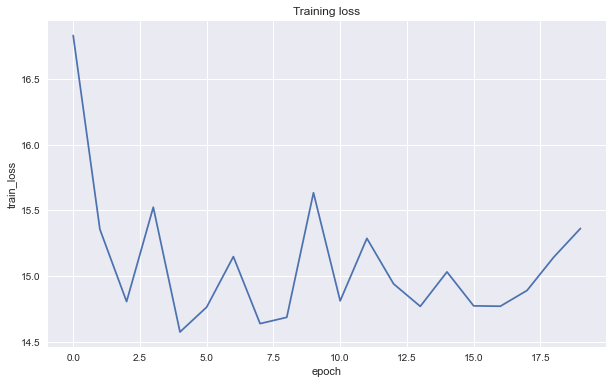

In [14]:
plot_history(history1)

In [15]:
model1 = Linear()
epochs = 20
optimizer = torch.optim.SGD(model1.parameters(), lr= 0.0001)
history1 = train_model(model1, optimizer, train_dl1, epochs=epochs)

Epoch # 0
    Batch # 0
Loss: tensor(49.6294, grad_fn=<L1LossBackward>)
    Batch # 1
Loss: tensor(44.9866, grad_fn=<L1LossBackward>)
    Batch # 2
Loss: tensor(49.3343, grad_fn=<L1LossBackward>)
    Batch # 3
Loss: tensor(50.2099, grad_fn=<L1LossBackward>)
    Batch # 4
Loss: tensor(46.5407, grad_fn=<L1LossBackward>)
    Batch # 5
Loss: tensor(51.1187, grad_fn=<L1LossBackward>)
    Batch # 6
Loss: tensor(45.1500, grad_fn=<L1LossBackward>)
    Batch # 7
Loss: tensor(48.3485, grad_fn=<L1LossBackward>)
    Batch # 8
Loss: tensor(39.7642, grad_fn=<L1LossBackward>)
    Batch # 9
Loss: tensor(43.2841, grad_fn=<L1LossBackward>)
    Batch # 10
Loss: tensor(76.9706, grad_fn=<L1LossBackward>)
    Batch # 11
Loss: tensor(96.5884, grad_fn=<L1LossBackward>)
    Batch # 12
Loss: tensor(40.6361, grad_fn=<L1LossBackward>)
    Batch # 13
Loss: tensor(42.6184, grad_fn=<L1LossBackward>)
    Batch # 14
Loss: tensor(38.8292, grad_fn=<L1LossBackward>)
    Batch # 15
Loss: tensor(36.1314, grad_fn=<L1LossBac

Loss: tensor(5.2859, grad_fn=<L1LossBackward>)
Epoch # 15
    Batch # 0
Loss: tensor(6.2087, grad_fn=<L1LossBackward>)
    Batch # 1
Loss: tensor(4.3635, grad_fn=<L1LossBackward>)
    Batch # 2
Loss: tensor(28.3280, grad_fn=<L1LossBackward>)
    Batch # 3
Loss: tensor(13.6454, grad_fn=<L1LossBackward>)
    Batch # 4
Loss: tensor(44.4396, grad_fn=<L1LossBackward>)
    Batch # 5
Loss: tensor(13.9151, grad_fn=<L1LossBackward>)
    Batch # 6
Loss: tensor(7.0711, grad_fn=<L1LossBackward>)
    Batch # 7
Loss: tensor(19.0111, grad_fn=<L1LossBackward>)
    Batch # 8
Loss: tensor(6.8635, grad_fn=<L1LossBackward>)
    Batch # 9
Loss: tensor(58.5917, grad_fn=<L1LossBackward>)
    Batch # 10
Loss: tensor(4.7886, grad_fn=<L1LossBackward>)
    Batch # 11
Loss: tensor(10.2354, grad_fn=<L1LossBackward>)
    Batch # 12
Loss: tensor(5.4020, grad_fn=<L1LossBackward>)
    Batch # 13
Loss: tensor(7.8593, grad_fn=<L1LossBackward>)
    Batch # 14
Loss: tensor(9.3283, grad_fn=<L1LossBackward>)
    Batch # 15


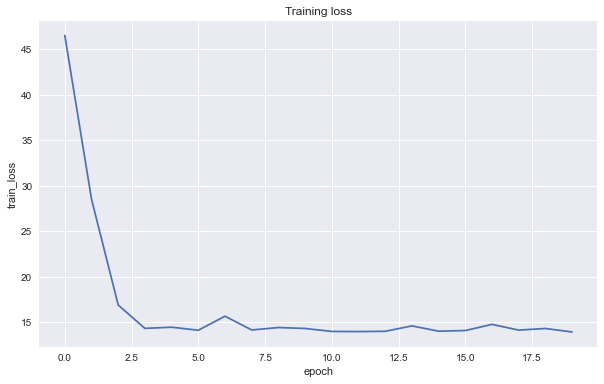

In [16]:
plot_history(history1)

This model uses all unscaled variables and a traget too skewed to 0. Training loss per epoch goes down but has many peaks. The model finds it hard to converge. The same demonstrates the evaluation scores. The smaller learning rate performs better.